# 2. Word2Vec

In [1]:
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import re
import matplotlib

In [2]:
matplotlib.use("TkAgg")

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset
* Julius Caesar
* Macbeth

In [4]:
data_dir = '../data/'

In [5]:
macbeth_file = data_dir + 'macbeth.txt'

In [6]:
caesar_file = data_dir + 'julius_caesar.txt'

### Remove the stopwords

In [7]:
stopword_file = data_dir + 'long_stopwords.txt'

In [8]:
stop_words = []

with open(stopword_file,'r') as inpFile:
    lines = inpFile.readlines()
    stop_words_temp = map(lambda x : re.sub('\n','',x),lines)
    stop_words = list(map(lambda x:  re.sub('[^A-Za-z0-9]+', '',x), stop_words_temp))


In [9]:
stop_words

['a',
 'able',
 'about',
 'above',
 'abst',
 'accordance',
 'according',
 'accordingly',
 'across',
 'act',
 'actually',
 'added',
 'adj',
 'affected',
 'affecting',
 'affects',
 'after',
 'afterwards',
 'again',
 'against',
 'ah',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'announce',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apparently',
 'approximately',
 'are',
 'aren',
 'arent',
 'arise',
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'at',
 'auth',
 'available',
 'away',
 'awfully',
 'b',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'begin',
 'beginning',
 'beginnings',
 'begins',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'biol',
 'both',
 'brief',
 'briefly',
 'but',
 'by',
 'c',
 'ca',
 'came',
 'can',
 'ca

In [10]:
type(stop_words)

list

In [11]:
def clean(word):
    word = word.strip()
    word = word.lower()
    word = re.sub('[^A-Za-z0-9]+', '', word)
    if word not in stop_words:
        return word
    else:
        return ''

In [12]:
clean("king's")

'kings'

In [13]:
clean("they'll")

''

In [14]:
line_count = 0
sentences = []

with open(macbeth_file,'r') as inpFile:
    x = inpFile.readlines()
    for line in x:
        if line is not None or line != '\n':
            words = line.split()
            words = map(lambda x: clean(x), words)
            words = list(filter(lambda x:True if len(x) > 0 else False, words))
            sentences.append(words)
            
with open(caesar_file,'r') as inpFile:
    x = inpFile.readlines()
    for line in x:
        if line is not None or line != '\n':
            words = line.split()
            words = map(lambda x: clean(x), words)
            words = list(filter(lambda x:True if len(x) > 0 else False, words))
            sentences.append(words)


"          \nwith open(macbeth_file,'r') as inpFile:\n    x = inpFile.readlines()\n    for line in x:\n        cleaned_line = []\n        words = line.split()\n        for word in words:\n            cleaned_line.append(clean(word))\n        sentences.append(cleaned_line)\n        line_count += 1\n         \nwith open(caesar_file,'r') as inpFile:\n    x = inpFile.readlines()\n    for line in x:\n        cleaned_line = []\n        words = line.split()\n        for word in words:\n            cleaned_line.append(clean(word))\n        sentences.append(cleaned_line)\n        line_count += 1\n"

In [15]:
sentences

[['1606'],
 [],
 ['tragedy', 'macbeth'],
 [],
 [],
 ['william', 'shakespeare'],
 [],
 [],
 [],
 ['dramatis', 'personae'],
 [],
 ['duncan', 'king', 'scotland'],
 ['macbeth', 'thane', 'glamis', 'cawdor', 'general', 'kings'],
 ['army'],
 ['lady', 'macbeth', 'wife'],
 ['macduff', 'thane', 'fife', 'nobleman', 'scotland'],
 ['lady', 'macduff', 'wife'],
 ['malcolm', 'elder', 'son', 'duncan'],
 ['donalbain', 'younger', 'son', 'duncan'],
 ['banquo', 'thane', 'lochaber', 'general', 'kings', 'army'],
 ['fleance', 'son'],
 ['lennox', 'nobleman', 'scotland'],
 ['ross', 'nobleman', 'scotland'],
 ['menteith', 'nobleman', 'scotland'],
 ['angus', 'nobleman', 'scotland'],
 ['caithness', 'nobleman', 'scotland'],
 ['siward', 'earl', 'northumberland', 'general', 'english', 'forces'],
 ['young', 'siward', 'son'],
 ['seyton', 'attendant', 'macbeth'],
 ['hecate', 'queen', 'witches'],
 ['three', 'witches'],
 ['boy', 'son', 'macduff'],
 ['gentlewoman', 'attending', 'lady', 'macbeth'],
 ['english', 'doctor'],
 [

In [16]:
sentences[100:110]

[['spring', 'comfort', 'seemd'],
 ['discomfort', 'swells', 'mark', 'king', 'scotland', 'mark'],
 ['sooner', 'justice', 'valor', 'armd'],
 ['compelld', 'skipping', 'kerns', 'trust', 'heels'],
 ['norweyan', 'lord', 'surveying', 'vantage'],
 ['furbishd', 'arms', 'supplies', 'men'],
 ['began', 'fresh', 'assault'],
 ['duncan', 'dismayd'],
 ['captains', 'macbeth', 'banquo'],
 ['sergeant']]

## Word2Vec model

In [17]:
model = Word2Vec(sentences, window=5, size=500, workers=4, min_count=5)

In [18]:
model.wv.vocab

{'1': <gensim.models.keyedvectors.Vocab at 0x1309a7ef0>,
 '19901993': <gensim.models.keyedvectors.Vocab at 0x1309a7be0>,
 '2': <gensim.models.keyedvectors.Vocab at 0x1309a7f28>,
 'afraid': <gensim.models.keyedvectors.Vocab at 0x1309ab860>,
 'age': <gensim.models.keyedvectors.Vocab at 0x1309b5198>,
 'air': <gensim.models.keyedvectors.Vocab at 0x1309a1ba8>,
 'alarum': <gensim.models.keyedvectors.Vocab at 0x1309a1dd8>,
 'alarums': <gensim.models.keyedvectors.Vocab at 0x1309b5550>,
 'alas': <gensim.models.keyedvectors.Vocab at 0x1309af240>,
 'alive': <gensim.models.keyedvectors.Vocab at 0x1309b34a8>,
 'ambition': <gensim.models.keyedvectors.Vocab at 0x1309a4940>,
 'ambitious': <gensim.models.keyedvectors.Vocab at 0x1309ba400>,
 'amen': <gensim.models.keyedvectors.Vocab at 0x1309ab9e8>,
 'angry': <gensim.models.keyedvectors.Vocab at 0x1309b3ef0>,
 'angus': <gensim.models.keyedvectors.Vocab at 0x1309a15c0>,
 'anon': <gensim.models.keyedvectors.Vocab at 0x1309a1c88>,
 'answer': <gensim.models

In [19]:
labels = []
tokens = []

for word in model.wv.vocab:
    tokens.append(model.wv[word])
    labels.append(word)
    


### TSNE plot to find the similarity of words

In [20]:
tsne_model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)

In [21]:
new_values = tsne_model.fit_transform(tokens)

In [22]:
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

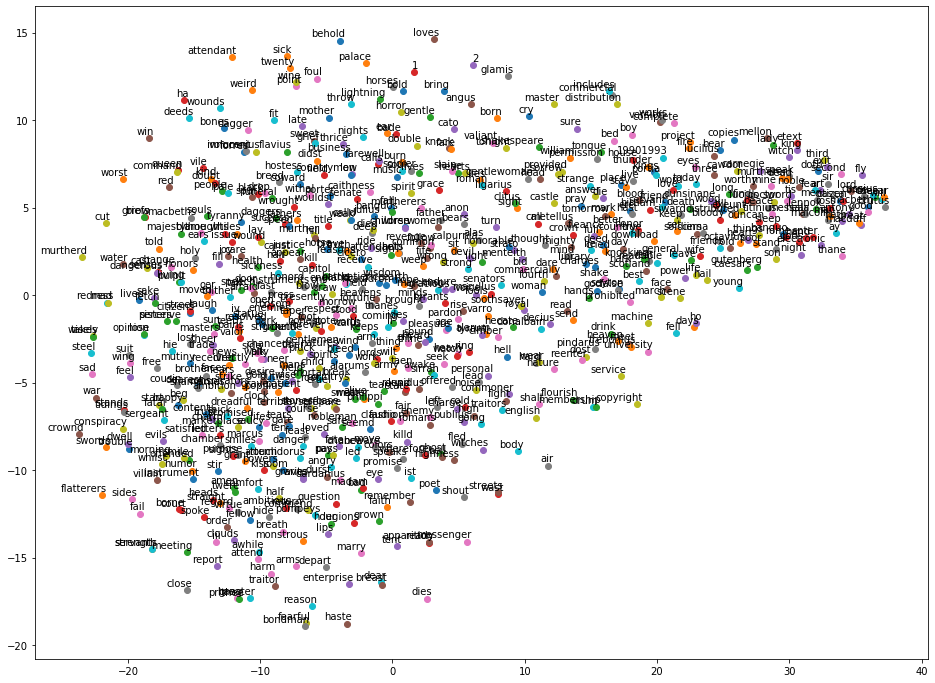

In [23]:
plt.figure(figsize=(16, 12)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()

### Analogies

In [24]:
model.wv.most_similar(positive=['caesar','duncan'],negative=['scotland'])


[('will', 0.6378711462020874),
 ('brutus', 0.6259875893592834),
 ('thee', 0.6115044355392456),
 ('time', 0.5915220379829407),
 ('great', 0.5856671333312988),
 ('noble', 0.579108715057373),
 ('good', 0.5785931944847107),
 ('macbeth', 0.5776998996734619),
 ('second', 0.5754555463790894),
 ('ross', 0.5745202302932739)]

In [25]:
model.wv.most_similar(positive=['caesar','duncan'],negative=['macbeth'])

[('will', 0.604515552520752),
 ('thee', 0.5698813796043396),
 ('brutus', 0.555194616317749),
 ('noble', 0.5408393740653992),
 ('time', 0.5393627882003784),
 ('malcolm', 0.5298926830291748),
 ('second', 0.5289353728294373),
 ('great', 0.527360200881958),
 ('doth', 0.524275004863739),
 ('lord', 0.5236332416534424)]

In [26]:
model.wv.most_similar(positive=['caesar','macbeth'],negative=['banquo'])

[('brutus', 0.672461986541748),
 ('cassius', 0.6717858910560608),
 ('hath', 0.6643816232681274),
 ('thee', 0.6593068838119507),
 ('good', 0.656310498714447),
 ('will', 0.6506947875022888),
 ('citizen', 0.6474111080169678),
 ('time', 0.6424666047096252),
 ('exit', 0.6401559114456177),
 ('macduff', 0.63170325756073)]

In [27]:
model.wv.most_similar(positive=['rome','scotland'],negative=['banquo'])

[('thee', 0.44469350576400757),
 ('cassius', 0.42992597818374634),
 ('sir', 0.42816588282585144),
 ('lord', 0.4250543713569641),
 ('caesar', 0.4218105673789978),
 ('brutus', 0.4141889810562134),
 ('macduff', 0.4128844141960144),
 ('hath', 0.4111917018890381),
 ('second', 0.4086378812789917),
 ('good', 0.4082835018634796)]

In [28]:
model.wv.doesnt_match("duncan macbeth scotland banquo".split())

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/models/keyedvectors.py:857: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'scotland'